# Report

---



### Learning Algorithm

This project uses Reinforcement learning to solve the environment. We have chosen to use a value function to map the state to a Q value for each potential action. We randomly choose actions towards the beginning of the training process to explore the state space and then slowly reduce the frequency or random actions in favour of epsilon-greedy ones. The result is that as we continue to take actions in line with our policy, we will eventually converge at a policy that solves the environment. This process is called Q-Learning.

Because the state space is continuous we chose to use a neural network to hold the weight representation of each of the states encountered. This prevents us from having to use a table (which is expensive on large problems) or having a to discretise our state representation (which makes us lose information). Holding our weights within a neural network also gives us the advantage of being able to generalise over state spaces that the agent hasn't previously encountered, meaning that we don't need to explicitly visit every state space in order to make an informed decision. 

The neural network had the following architecture. The first layer had 64 units, second 64, and the third 4 units. 64 units were chosen for layers 1 and 2 as it is the most computationally efficient for modern day computers to work within that scale factor. The final layer had 4 units in the final layer because it corresponds to the number of actions that the agent can take within the environment. 

The other hyperparameters used are listed below along with their explanations:

BUFFER_SIZE = int(1e5)      A medium-sized buffer size was chosen. We still want our agent to recall transitions from a while back, however, we don’t want to bloat the agent with a memory of unoptimised weights from the beginning of training.
BATCH_SIZE = 64         this minibatch size was chosen for computational efficiency
GAMMA = 0.99            this discount factor was chosen to ensure that there was a small decay on future rewards. This was used as in incentive to take rewards greedy, while also considering long-term strategies.  
TAU = 1e-3              #  A soft update of target parameters was chosen to ensure that the expected return was shared between all potential actions. This was done to model noise into the problem, helping to converge easier in the future.
LR = 5e-4               # A small learning rate was used to ensure that old approximations of a state space were not complete overridden by new ones.
UPDATE_EVERY = 4        # how often to update the network

### Plot of Rewards

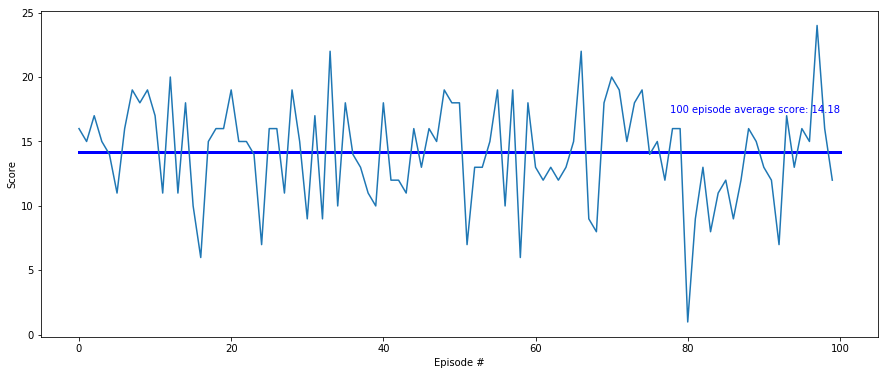

In [8]:
import numpy as np
import matplotlib.pyplot as plt

scores_ = np.load('scores.npy')
avg_score = np.array(scores_[-100:]).mean()

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
plt.plot([0, 100],[avg_score, avg_score],lw=3, color='b')
plt.plot(np.arange(len(scores_[-100:])), scores_[-100:])
ax.annotate('100 episode average score: {}'.format(avg_score),
            xy=(0.75, 0.7), xycoords='figure fraction', color = 'b')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Ideas for Future Work

There are multiple ways that we could improve the algorithm. The first way would be converting the top layer into a dealing network. By doing so we would be estimating the Q value for every action as well as the relevance, by doing this, the network would be able to focus its attention on states that actually mattered. 

Another way we could improve this methodology would be by using prioritised replay. This is when we select a subset of the data to train over that contains a predetermined proportion of transitions where the temporal difference is high instead of sampling uniformly from the experience replay buffer. The result is that we encounter unexpected/ unexplained transitions more often, thus giving our agent more time to rationalise those decisions before they move out of the replay buffer. The result is that the agent will make more effective use from it training time. 

### Admin

Uploading files to get:

In [10]:
!git init

Initialized empty Git repository in /home/workspace/.git/


In [12]:
!git add .